In [6]:
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import seaborn as sns
from scipy.special import kn,zetac
import copy
import mypyslha as pyslha
from addCombinedLimit import getCombinedR, CovarianceHandler
sns.set() #Set style
sns.set_style('ticks',{'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
sns.set_palette(sns.color_palette("Paired"))

## Get CheckMate exclusion

In [10]:
cmFile = 'BS1p_exclusion_CheckMATE.txt'

with open(cmFile,'r') as f:
    pars = f.readlines()[0].replace('#','').strip()
    pars = pars.split(',')
for p in pars:
    p = p.replace(',','')
    label,val = p.split('=')
    if 'lambdaL' in label.strip():
        lambdaL = eval(val.replace('=',''))
    elif 'lambdaR' in label.strip():
        lambdaR = eval(val.replace('=',''))
    elif 'mLQ' in label.strip():
        mLQ = eval(val.replace('=',''))
    
excCM = np.genfromtxt(cmFile,delimiter=',',names=True,skip_header=1)
print(excCM.dtype)

0.875 0.375 1250.0
[('mchi1_GeV', '<f8'), ('mchi1mchi0_GeV', '<f8')]


## Get SModelS exclusion

In [11]:
smsFile = 'BS1p_exclusion_SModelS.txt'

with open(smsFile,'r') as f:
    pars = f.readlines()[0].replace('#','').strip()
    pars = pars.split(',')
for p in pars:
    p = p.replace(',','')
    label,val = p.split('=')
    if 'lambdaL' in label.strip():
        lambdaL_sms = eval(val.replace('=',''))
        if lambdaL_sms != lambdaL:
            print('lamdaL differs',lambdaL_sms,lambdaL)
    elif 'lambdaR' in label.strip():
        lambdaR_sms = eval(val.replace('=',''))
        if lambdaR_sms != lambdaR:
            print('lamdaR differs',lambdaR_sms,lambdaR)
        
    elif 'mLQ' in label.strip():
        mLQ_sms = eval(val.replace('=',''))
        if mLQ_sms != mLQ:
            print('mLQ differs',mLQ_sms,mLQ)
        

excSMS = np.genfromtxt(smsFile,delimiter=',',names=True,skip_header=1)
print(excSMS.dtype)

[('mchi1_GeV', '<f8'), ('mchi1mchi0_GeV', '<f8')]


## Plot Curves

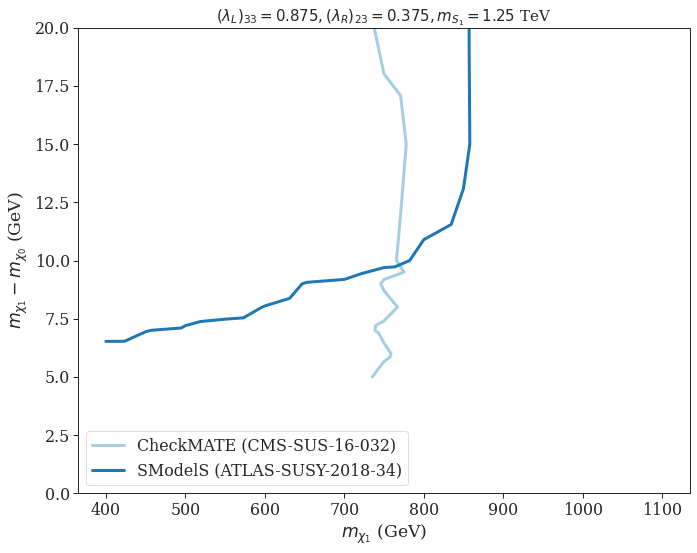

In [15]:
fig = plt.figure(figsize=(10,8))
   
    
plt.plot(excCM['mchi1_GeV'],excCM['mchi1mchi0_GeV'],label='CheckMATE (CMS-SUS-16-032)',linewidth=3)    
plt.plot(excSMS['mchi1_GeV'],excSMS['mchi1mchi0_GeV'],label='SModelS (ATLAS-SUSY-2018-34)',linewidth=3)    
plt.title(r"$\left(\lambda_L\right)_{33} = %1.3f, \left(\lambda_R\right)_{23} = %1.3f, m_{S_1} = %1.2f$ TeV"
          %(lambdaL,lambdaR,mLQ/1000.0) ,fontsize=15)
plt.xlabel(r'$m_{\chi_1}$ (GeV)')    
plt.ylabel(r'$m_{\chi_1}-m_{\chi_0}$ (GeV)')
plt.ylim(0,20)
plt.legend()
plt.tight_layout()
plt.savefig('BS1p_exclusion.png')
plt.show()